In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

report = pd.read_csv('experiments.csv')

# Filter data where predicted_result equals real_result
corrected_predictions_df = report[report['predicted_result'] == report['real_result']]

def verify_gt(predict_name):
    if predict_name == 'HSIL':
        return 2
    elif predict_name == 'LSIL':
        return 1
    else:
        return 1
    
def verify_analyst(predict_name):
    if predict_name == 'HSIL':
        return 0
    elif predict_name == 'LSIL':
        return 1
    else:
        return 1
    
def verify_complexity(predict_name):
    if predict_name == 'HSIL':
        return 0
    elif predict_name == 'LSIL':
        return 1
    else:
        return 1
    
def verify_numerical_rep(class_name):
    if class_name == 'HSIL':
        return 0
    elif class_name == 'LSIL':
        return 1
    else:
        return 2

report['grupo_trabalho_real'] = report['real_result'].apply(verify_gt)
report['grupo_trabalho_previsto'] = report['predicted_result'].apply(verify_gt)

report['analista_real'] = report['real_result'].apply(verify_analyst)
report['analista_previsto'] = report['predicted_result'].apply(verify_analyst)

report['complexidade_real'] = report['real_result'].apply(verify_complexity)
report['complexidade_previsto'] = report['predicted_result'].apply(verify_complexity)

report['real_result_numerical'] = report['real_result'].apply(verify_numerical_rep)
report['predicted_result_numerical'] = report['predicted_result'].apply(verify_numerical_rep)


print('Quantidade de lâminas analisadas:', len(report))
print('Modelo acertou na mosca:',round((len(corrected_predictions_df)/len(report))*100, 1), '%')

Quantidade de lâminas analisadas: 91
Modelo acertou na mosca: 61.5 %


In [94]:
corrected_predictions_hsil_df = corrected_predictions_df[corrected_predictions_df['predicted_result'] == 'HSIL']
reported_hsil_df = report[report['real_result'] == 'HSIL']
success_rate = (len(corrected_predictions_hsil_df) / len(reported_hsil_df)) * 100
print(f'HSIL => {round(success_rate, 0)}% de acerto')

HSIL => 79.0% de acerto


In [95]:
corrected_predictions_lsil_df = corrected_predictions_df[corrected_predictions_df['predicted_result'] == 'LSIL']
reported_lsil_df = report[report['real_result'] == 'LSIL']
success_rate = (len(corrected_predictions_lsil_df) / len(reported_lsil_df)) * 100
print(f'LSIL => {round(success_rate, 0)}% de acerto')

LSIL => 79.0% de acerto


In [96]:
corrected_predictions_negative_df = report[report['predicted_result'] == 'NEGATIVO']
reported_negative_df = report[report['real_result'] == 'NEGATIVO']
success_rate = (len(corrected_predictions_negative_df) / len(reported_negative_df)) * 100
print(f'NEGATIVO => {round(success_rate, 0)}% de acerto')

NEGATIVO => 25.0% de acerto


In [97]:
corrected_predictions_gt_df = report[report['grupo_trabalho_previsto'] == report['grupo_trabalho_real']]
success_rate = (len(corrected_predictions_gt_df) / len(report)) * 100
print(f'GRUPOS DE TRABALHO => {round(success_rate, 0)}% de acerto')

GRUPOS DE TRABALHO => 75.0% de acerto


In [98]:
corrected_predictions_analist_df = report[report['analista_real'] == report['analista_previsto']]
success_rate = (len(corrected_predictions_analist_df) / len(report)) * 100
print(f'ANALISTAS => {round(success_rate, 0)}% de acerto')

ANALISTAS => 75.0% de acerto


In [99]:
corrected_predictions_complexity_df = report[report['complexidade_real'] == report['complexidade_previsto']]
success_rate = (len(corrected_predictions_complexity_df) / len(report)) * 100
print(f'COMPLEXIDADE => {round(success_rate, 0)}% de acerto')

COMPLEXIDADE => 75.0% de acerto


In [104]:
print(f'TEMPO MÉDIO DE ANÁLISE LÂMINA => {round(report['time'].mean()/60, 0)} minutos')

AttributeError: 'Series' object has no attribute 'avg'

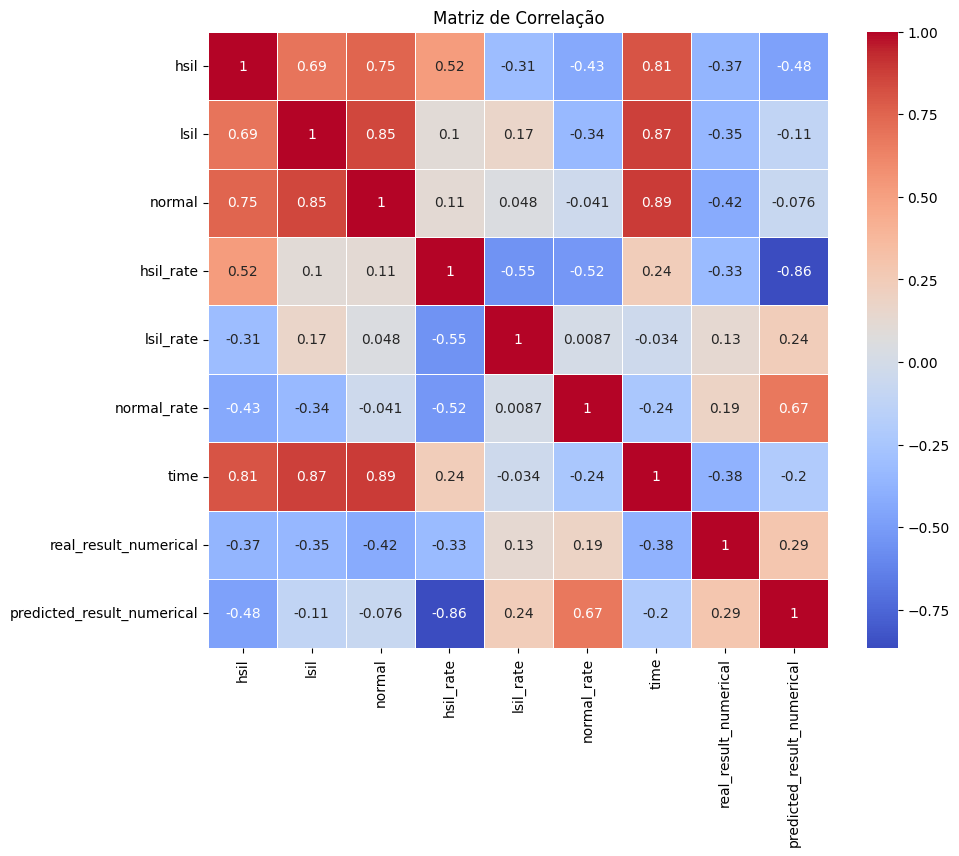

In [101]:
correlation = report[['hsil', 'lsil', 'normal', 'hsil_rate', 'lsil_rate', 'normal_rate', 'time','real_result_numerical', 'predicted_result_numerical']].corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

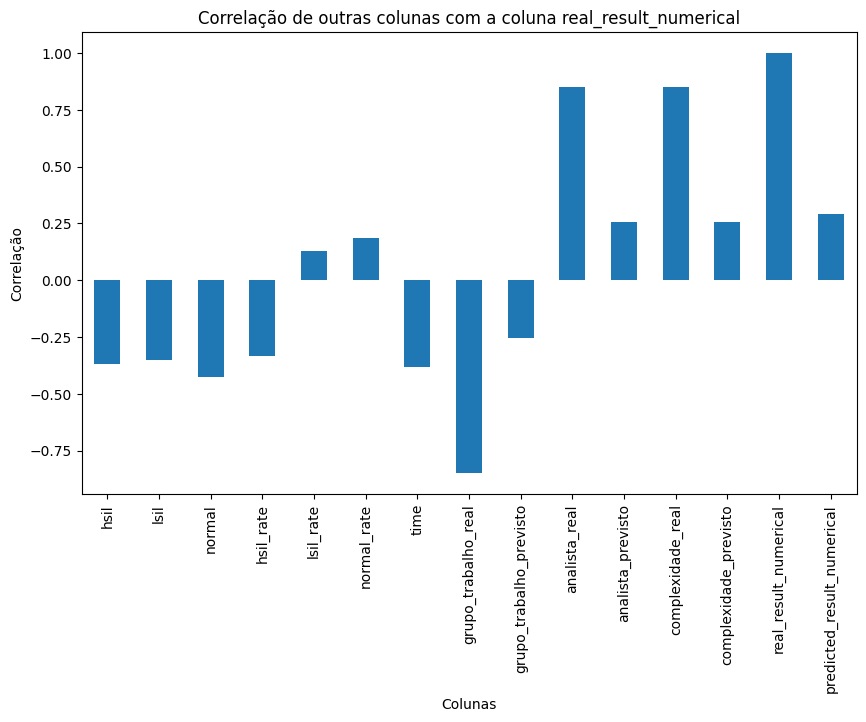

In [102]:
correlation_column = 'real_result_numerical'
correlation = report.corrwith(other=report[correlation_column],method='pearson', numeric_only=True)

plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title(f'Correlação de outras colunas com a coluna {correlation_column}')
plt.xlabel('Colunas')
plt.ylabel('Correlação')
plt.show()

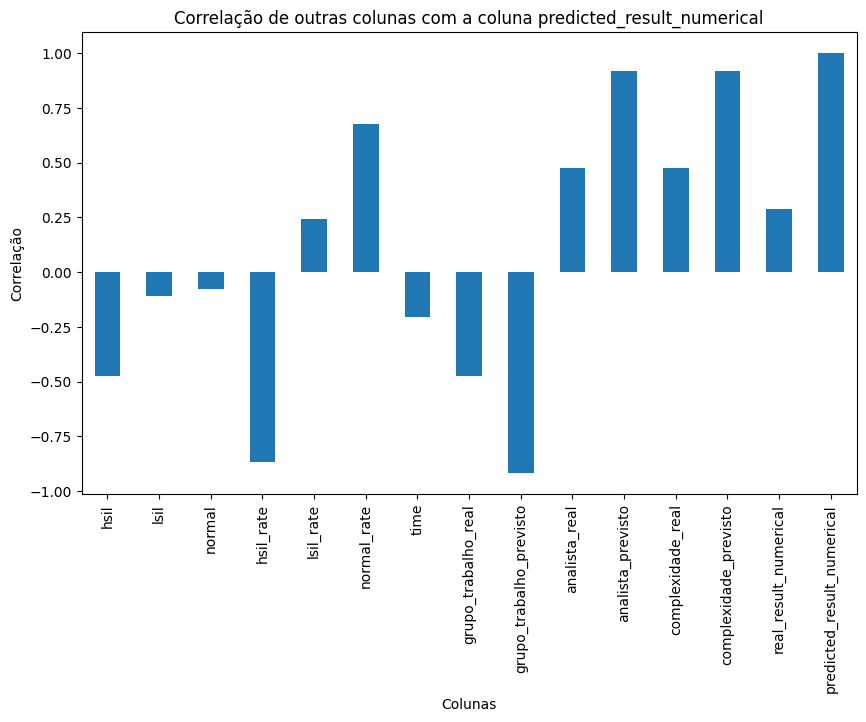

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_column = 'predicted_result_numerical'
correlation = report.corrwith(other=report[correlation_column],method='pearson', numeric_only=True)
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Matriz de Correlação')
# plt.show()
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title(f'Correlação de outras colunas com a coluna {correlation_column}')
plt.xlabel('Colunas')
plt.ylabel('Correlação')
plt.show()